In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the data
file_path = "/content/MILDEC_long_out_analyzed.csv"
df = pd.read_csv(file_path)

# Define levels
level_cols = ['Fear Level', 'Stress Level', 'Morale Level', 'Trust Level']

/tmp/ipython-input-133354004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-133354004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-133354004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-133354004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

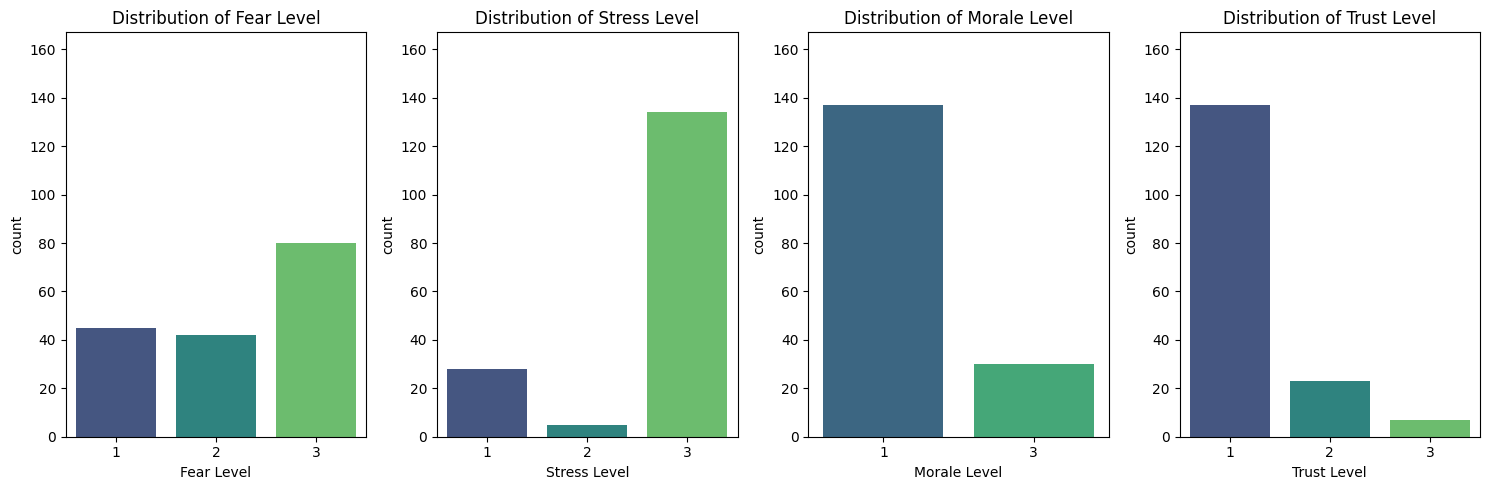

In [4]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(level_cols, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.ylim(0, len(df))

plt.tight_layout()
plt.show()

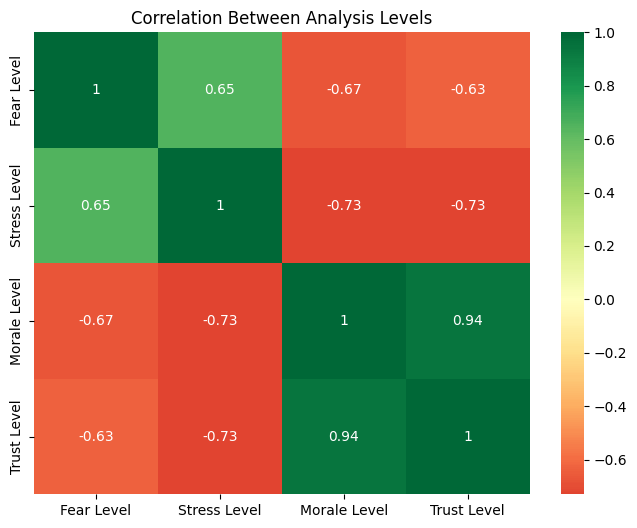

In [5]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[level_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title("Correlation Between Analysis Levels")
plt.show()

In [ ]:
def spot_check(category, level):
    print(f"--- Samples for {category} == {level} ---")
    samples = df[df[category] == level].sample(min(3, len(df[df[category] == level])))

    text_col = 'text'

    for i, row in samples.iterrows():
        print(f"TEXT: {row[text_col][:150]}...")
        print(f"SCORES: Fear:{row['Fear Level']} | Stress:{row['Stress Level']} | Morale:{row['Morale Level']}")
        print("-" * 20)

spot_check('Stress Level', 3)

--- Samples for Stress Level == 3 ---
TEXT: My Heart Beats Like a Kaval Drum' - Donovian Tribute Pours Out Grief and Honor After Temple Tragedy Tribal Rhythms Turn Tragic: Infantryman's Farewell...
SCORES: Fear:2 | Stress:3 | Morale:1
--------------------
TEXT: Property Damage Showdown Property Damage Showdown Imagine being the proud owner of a beautiful home, only to wake up one morning and find that it's be...
SCORES: Fear:1 | Stress:3 | Morale:1
--------------------
TEXT: Noise Pollution in Meador-Groce Area Raises Concerns Noise Pollution in Meador-Groce Area Raises Concerns A growing number of residents in Temple, Tex...
SCORES: Fear:3 | Stress:3 | Morale:1
--------------------


In [7]:
confused_rows = df[(df['Stress Level'] == 3) & (df['Morale Level'] == 3)]
print(f"Number of 'conflicting' rows (High Stress & High Morale): {len(confused_rows)}")
if len(confused_rows) > 0:
    print(confused_rows[['text', 'Stress Level', 'Morale Level']].head())

Number of 'conflicting' rows (High Stress & High Morale): 7
                                                  text  Stress Level  \
54   Central Texas Residents Protest NATO Personnel...             3   
60   Noise Complaints Go Global Noise Complaints Go...             3   
63   Central Texas Residents Sound Off on NATO Trai...             3   
75   Central Texas Residents Speak Out Against Mili...             3   
141  Community Comes Together to Address Disturbanc...             3   

     Morale Level  
54              3  
60              3  
63              3  
75              3  
141             3  
